## 1- Descriptive analysis

In [1]:
# png(file="normal.png")
# dev.off()
data_purchase = read.csv("data_purchase_behaviour.csv")
head(data_purchase)

User_ID,Gender,City_Category,Stay_In_Current_City_Years,Marital_Status,Age_num,Purchase
1003311,M,A,4,0,30,3169
1005583,M,B,2,1,58,20453
1001702,M,C,2,0,23,7053
1001390,M,C,3,1,43,7947
1000048,M,B,3,1,34,5265
1005767,M,B,0,0,33,12748


### a- Lists variables in the dataset

In [2]:
names(data_purchase)

[1] "User_ID"                    "Gender"                    
[3] "City_Category"              "Stay_In_Current_City_Years"
[5] "Marital_Status"             "Age_num"                   
[7] "Purchase"

In [3]:
str(data_purchase)

'data.frame':	159000 obs. of  7 variables:
 $ User_ID                   : int  1003311 1005583 1001702 1001390 1000048 1005767 1002414 1001391 1003684 1004808 ...
 $ Gender                    : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ City_Category             : Factor w/ 3 levels "A","B","C": 1 2 3 3 2 2 3 3 3 1 ...
 $ Stay_In_Current_City_Years: int  4 2 2 3 3 0 4 0 4 1 ...
 $ Marital_Status            : int  0 1 0 1 1 0 1 1 1 1 ...
 $ Age_num                   : int  30 58 23 43 34 33 33 44 30 43 ...
 $ Purchase                  : int  3169 20453 7053 7947 5265 12748 8578 15621 5203 9941 ...


###  b- Summary of the dataset

In [4]:
summary(data_purchase)

    User_ID        Gender     City_Category Stay_In_Current_City_Years
 Min.   :1000001   F: 39374   A:42368       Min.   :0.000             
 1st Qu.:1001523   M:119626   B:67102       1st Qu.:1.000             
 Median :1003084              C:49530       Median :2.000             
 Mean   :1003033                            Mean   :1.856             
 3rd Qu.:1004482                            3rd Qu.:3.000             
 Max.   :1006040                            Max.   :4.000             
 Marital_Status     Age_num         Purchase    
 Min.   :0.000   Min.   :10.00   Min.   :   12  
 1st Qu.:0.000   1st Qu.:27.00   1st Qu.: 5828  
 Median :0.000   Median :33.00   Median : 8044  
 Mean   :0.411   Mean   :34.81   Mean   : 9270  
 3rd Qu.:1.000   3rd Qu.:42.00   3rd Qu.:12059  
 Max.   :1.000   Max.   :75.00   Max.   :23961  

## c- Some plots for the Quantitative variables

### Variable Purchase and Age_num

[1] 1 2

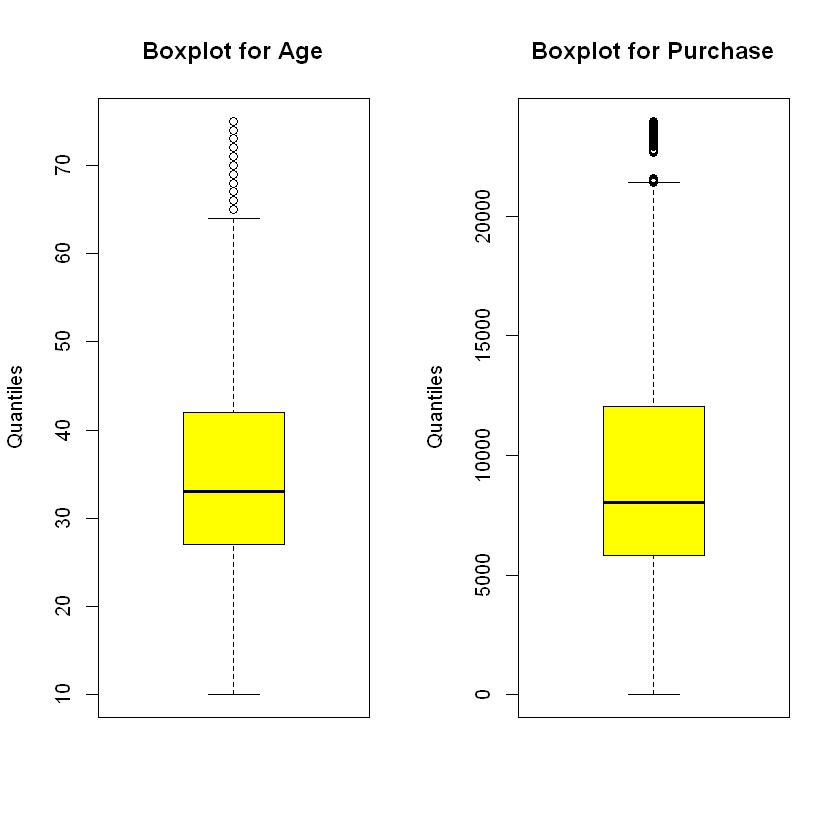

In [5]:
split.screen(1:2);
screen(2);
boxplot(data_purchase[c('Purchase')],
        col = c("yellow"),          
        main = paste("Boxplot for Purchase"),    
        ylab = "Quantiles")             
screen(1);
boxplot(data_purchase[c('Age_num')],
        col = c("yellow"),                 
        main = paste("Boxplot for Age"),     
        ylab = "Quantiles")  

### Histogram for Purchase and Age_num

Warning message in par(new = TRUE):
"appel de par(new=TRUE) sans graphe"

[1] 3 4

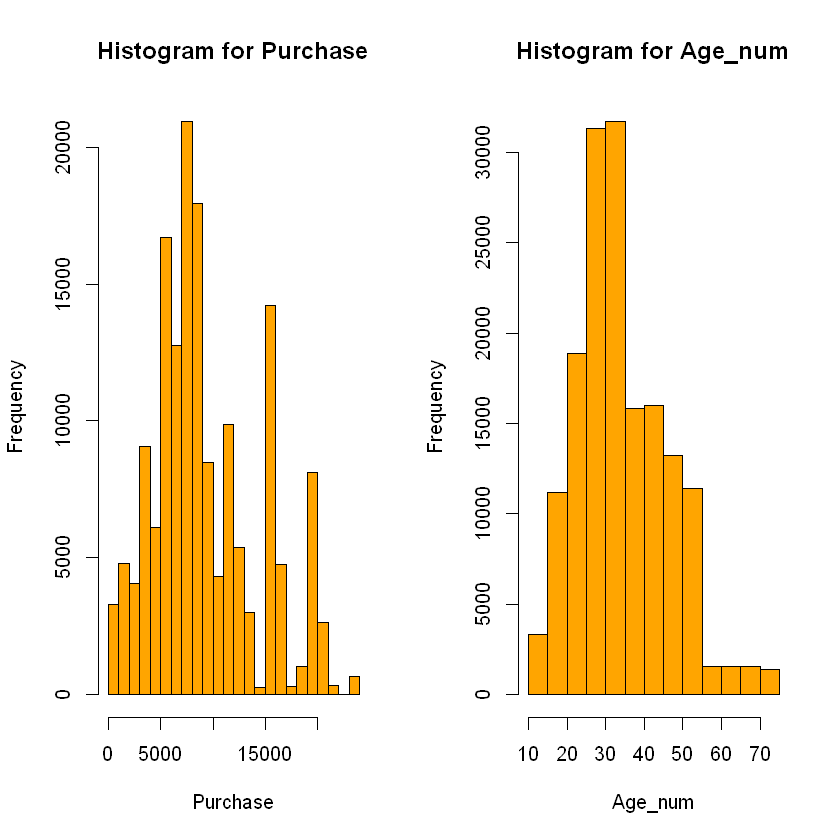

In [6]:
split.screen(1:2);
screen(2);
hist(data_purchase$Age_num, 
      col = c("orange"),
      main = paste("Histogram for Age_num"),
      xlab = "Age_num")            
screen(1);
hist(data_purchase$Purchase, 
      col = c("orange"),
      main = paste("Histogram for Purchase"),
      xlab = "Purchase")  

## d- Some plot for qualitatives variables

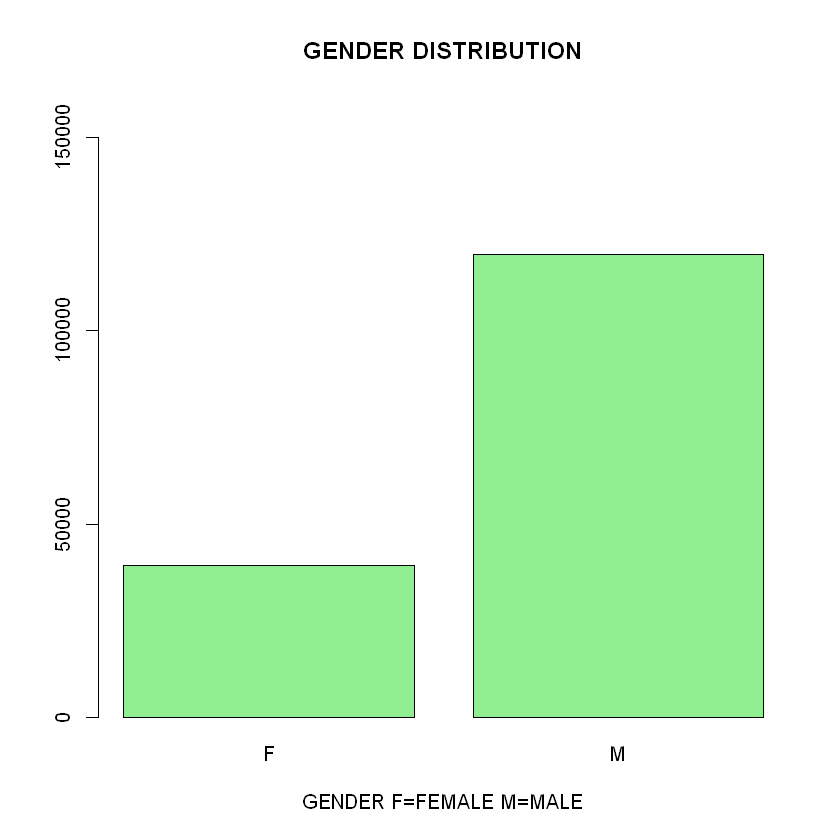

In [7]:
plot(data_purchase$Gender,ylim =c(0,160000),xlab=c("GENDER F=FEMALE M=MALE"),main="GENDER DISTRIBUTION",col="lightgreen")

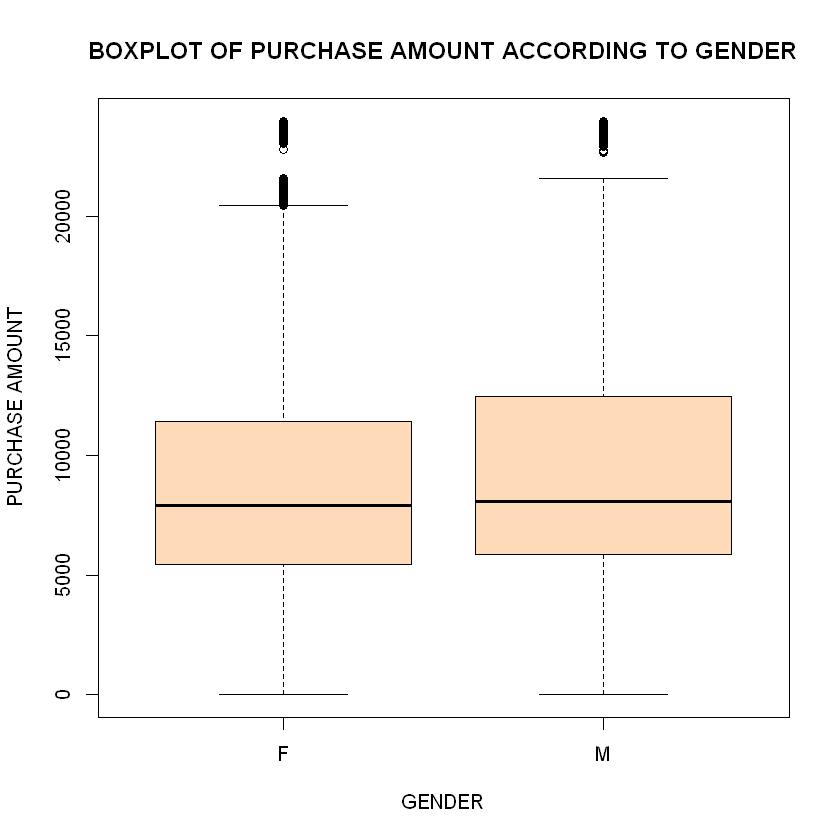

In [8]:
plot(data_purchase$Gender,data_purchase$Purchase,main="BOXPLOT OF PURCHASE AMOUNT ACCORDING TO GENDER",xlab="GENDER",ylab="PURCHASE AMOUNT",col ="peachpuff")

In [9]:
data_purchase$Marital_Status <- factor(data_purchase$Marital_Status,levels = c(0,1),labels = c("UNMARRIED","MARRIED"))

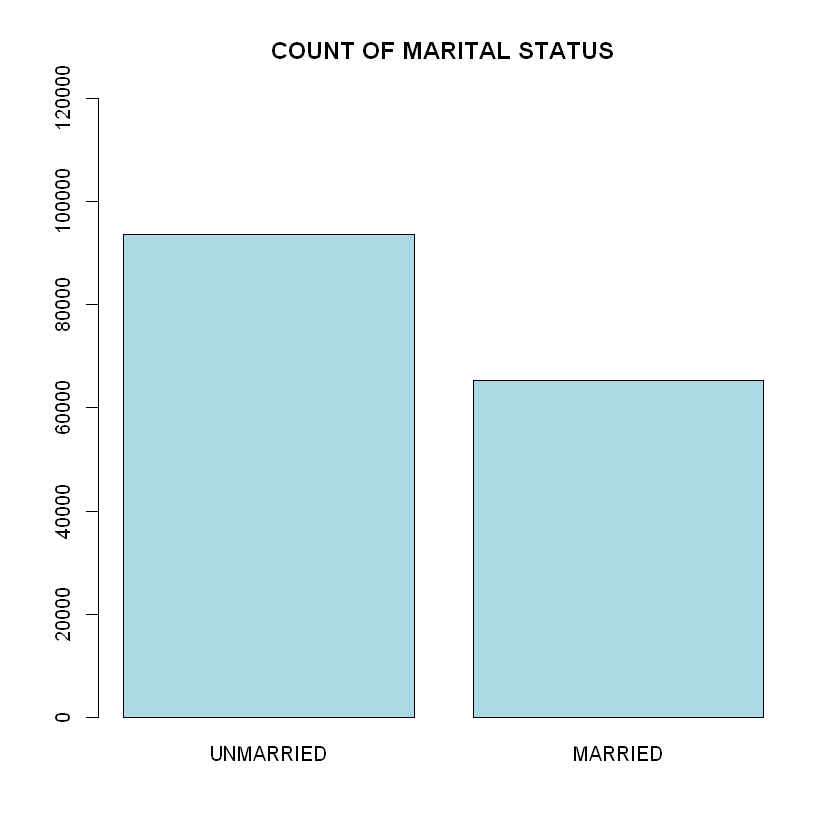

In [10]:
plot(data_purchase$Marital_Status,ylim=c(0,120000),main="COUNT OF MARITAL STATUS",col="lightblue")

### Some useful comment about the dataset

### TOTAL CUSTOMER AND THEIR AGES

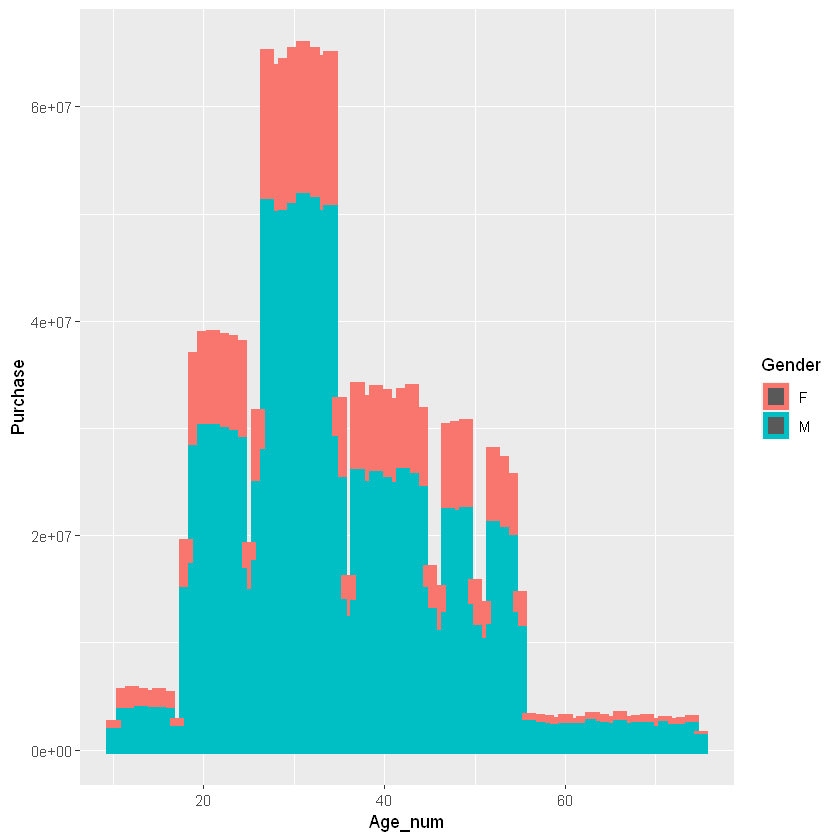

In [11]:
library(ggplot2)
g1<-ggplot(data_purchase, aes(x=Age_num, y=Purchase)) + geom_col(aes(col=Gender),size=2,width = 0.8)
plot(g1)

### PURCHASE VS CUSTOMER STAY IN CITY

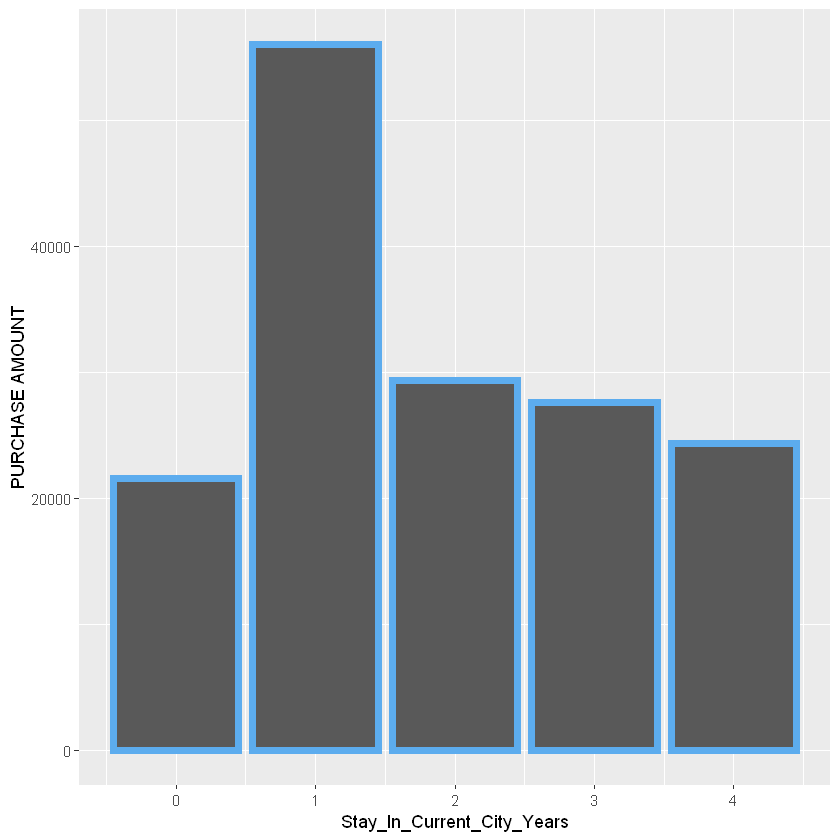

In [12]:
library(ggplot2)
g1<- ggplot(data_purchase,aes(x=Stay_In_Current_City_Years))+geom_bar(size=2,col="steelblue2",)+
  labs(y="PURCHASE AMOUNT")
plot(g1)

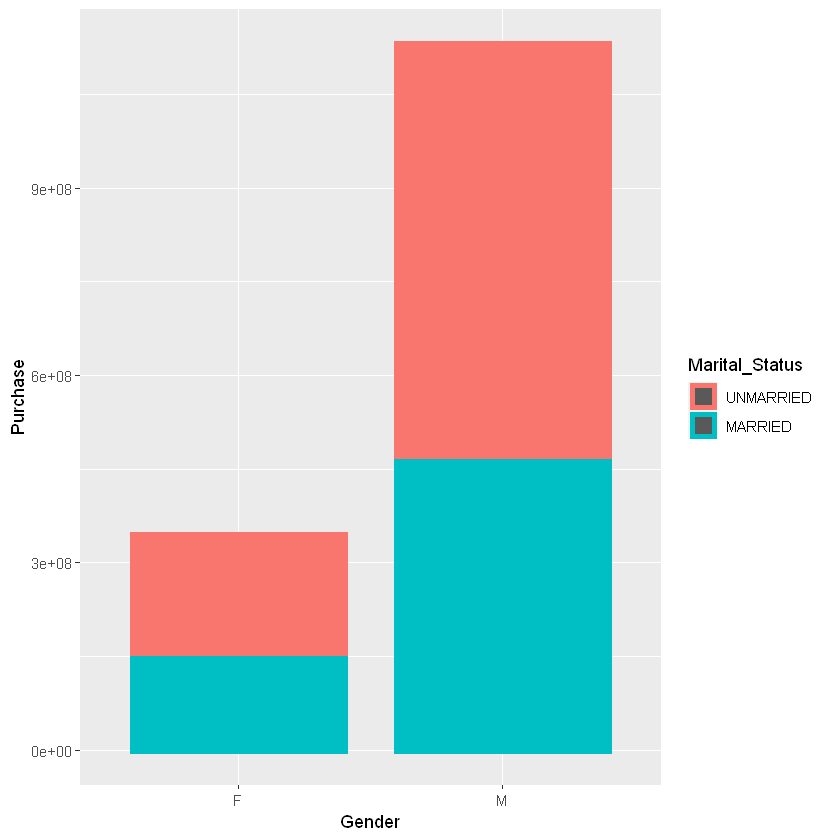

In [13]:
library(ggplot2)
g2<-ggplot(data_purchase, aes(x=Gender, y=Purchase)) + geom_col(aes(col=Marital_Status),size=2,width = 0.8)
plot(g2)

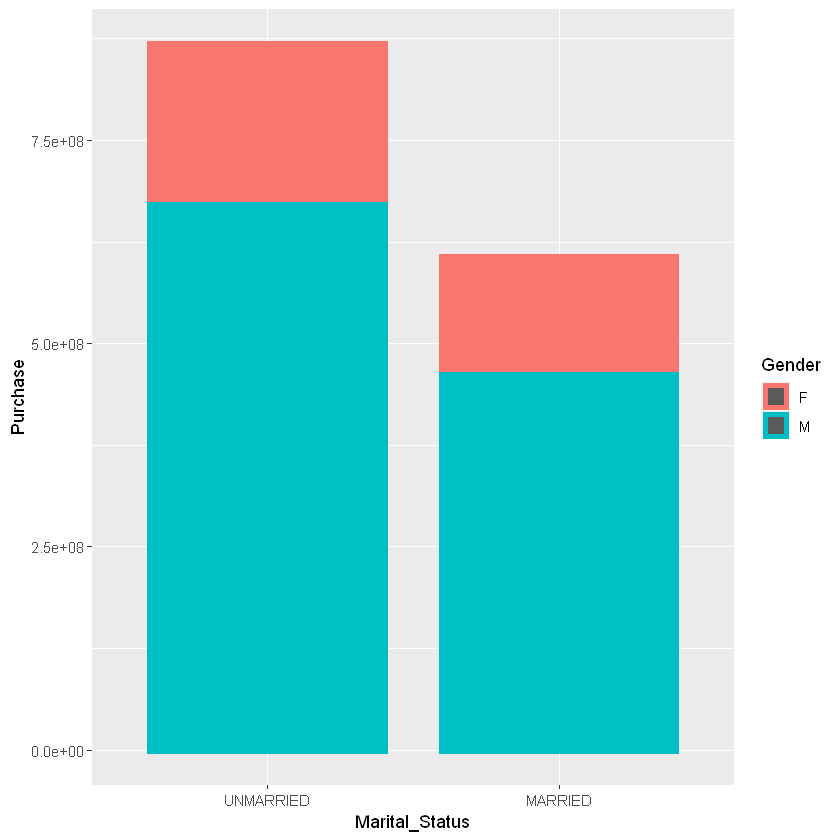

In [14]:
g3<-ggplot(data_purchase, aes(x=Marital_Status, y=Purchase)) + geom_col(aes(col=Gender),size=2,width = 0.8)
plot(g3)

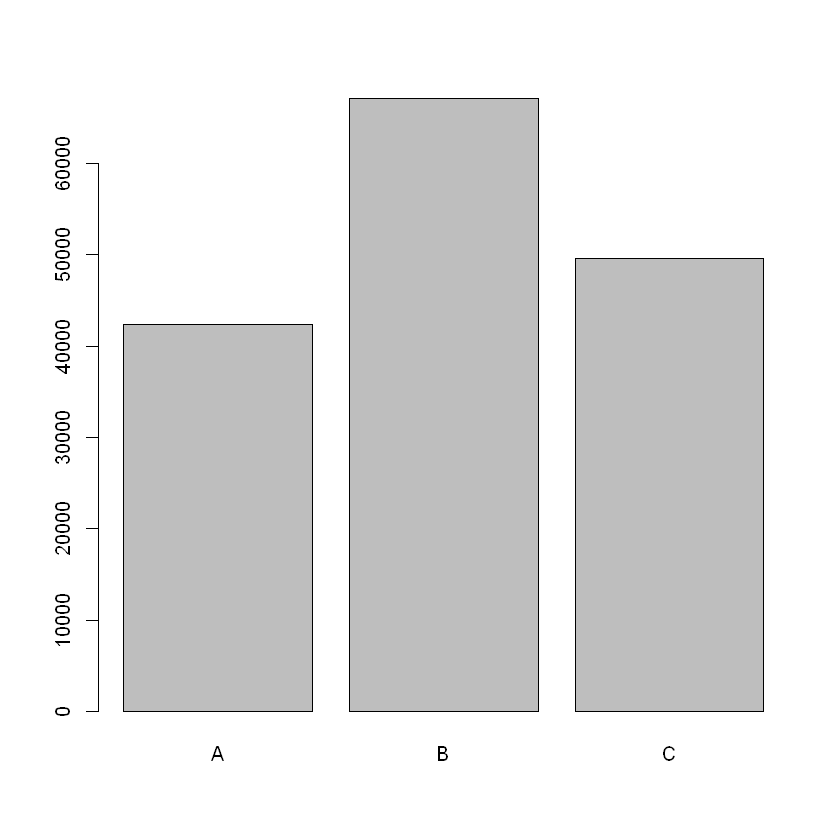

In [15]:
plot(data_purchase$City_Category)

### CORRELATION MATRIX

In [16]:
round(cor(Filter(is.numeric, data_purchase)),2)

,User_ID,Stay_In_Current_City_Years,Age_num,Purchase
User_ID,1.00,-0.03,0.04,0.01
Stay_In_Current_City_Years,-0.03,1.00,-0.01,0.00
Age_num,0.04,-0.01,1.00,0.02
Purchase,0.01,0.00,0.02,1.00


# 2a- Simple linear regression

In [17]:
Age = data_purchase$Age_num
Purchase = data_purchase$Purchase

### The summary of the model gives the intercept, the slope and the uncertainties

In [18]:
simple.fit = lm(Purchase~Age_num, data=data_purchase)
summary(simple.fit)


Call:
lm(formula = Purchase ~ Age_num, data = data_purchase)

Residuals:
   Min     1Q Median     3Q    Max 
 -9518  -3505  -1226   2800  14804 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9037.936     39.369 229.568  < 2e-16 ***
Age_num        6.681      1.072   6.234 4.55e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5026 on 158998 degrees of freedom
Multiple R-squared:  0.0002444,	Adjusted R-squared:  0.0002381 
F-statistic: 38.87 on 1 and 158998 DF,  p-value: 4.547e-10


# 3-

### We change M to 0 and F to 1 in our dataset

In [19]:
data_purchase$Gender <- factor(data_purchase$Gender,levels = c('M','F'),labels = c(0,1))

In [20]:
simple.fit2 = lm(Purchase~Gender, data=data_purchase)
summary(simple.fit2)


Call:
lm(formula = Purchase ~ Gender, data = data_purchase)

Residuals:
   Min     1Q Median     3Q    Max 
 -9433  -3481  -1234   2855  15215 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9445.13      14.51   651.1   <2e-16 ***
Gender1      -705.37      29.15   -24.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5017 on 158998 degrees of freedom
Multiple R-squared:  0.003669,	Adjusted R-squared:  0.003663 
F-statistic: 585.5 on 1 and 158998 DF,  p-value: < 2.2e-16
